<h1 style="font-size:36px; color:RED;">IMPORTING THE LIBRARIES</h1>

In [143]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [144]:
df = pd.read_csv("List of Countries by Sugarcane Production.csv")

In [145]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


<h1 style="font-size:36px; color:RED;">DATA CLEANING</h1>

In [147]:
df = pd.read_csv("List of Countries by Sugarcane Production.csv")
df["Production (Tons)"]= df["Production (Tons)"].str.replace(".", "")
df["Production per Person (Kg)"]= df["Production per Person (Kg)"].str.replace(".", "").str.replace(",",".")
df["Acreage (Hectare)"]= df["Acreage (Hectare)"].str.replace(".", "")
df["Yield (Kg / Hectare)"]= df["Yield (Kg / Hectare)"].str.replace(".", "").str.replace(",", ".")
df.rename(columns = {"Production (Tons)" : "Production(Tons)"}, inplace = True)
df.rename(columns = {"Production per Person (Kg)" : "Production_per_person(Kg)"}, inplace = True)
df.rename(columns = {"Acreage (Hectare)" : "Acreage(Hectare)"}, inplace = True)
df.rename(columns = {" 	Yield (Kg / Hectare)" : "Yield (Kg / Hectare)"}, inplace = True)



In [148]:
df.head()

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [149]:
#checking for the null values in the dataset
df.isnull().sum()
df[df["Acreage(Hectare)"].isnull()]
#since there is null value in this particular row for both Acreage(Hectare) and Yield (Kg / Hectare) so we will delete it 
#dropping the null values and reseting the index 
df = df.dropna().reset_index()
df=df.drop(["index", "Unnamed: 0"], axis = 1)




In [150]:
#Converting the datatype of numeric values
df["Production(Tons)"]= df["Production(Tons)"].astype("float")
df["Production_per_person(Kg)"]= df["Production_per_person(Kg)"].astype("float")
df["Acreage(Hectare)"]= df["Acreage(Hectare)"].astype("float")
df["Yield (Kg / Hectare)"]= df["Yield (Kg / Hectare)"].astype("float")

In [151]:
#DATATYPES OF THE COLUMNS
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_person(Kg)    float64
Acreage(Hectare)             float64
Yield (Kg / Hectare)         float64
dtype: object

UNIVARIATE ANALYSIS

In [153]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [154]:
df.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_person(Kg)    101
Acreage(Hectare)             101
Yield (Kg / Hectare)         102
dtype: int64

In [155]:
#continent wise production of sugarcane
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

Text(0.5, 1.0, 'CONTINENT WISE SUGARCANE PRODUCTION')

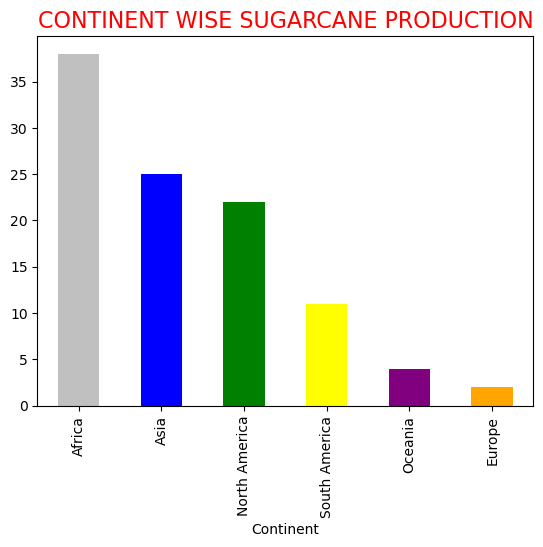

In [156]:
#bar graph for the above statement
colors = ["silver", "blue", "green","yellow", "purple", "orange"]
df["Continent"].value_counts().plot(kind= "bar", color = colors)
plt.title("CONTINENT WISE SUGARCANE PRODUCTION", color = "red", fontdict ={'fontsize': 16})

C:\Users\hp\AppData\Local\Temp\ipykernel_5692\1830331248.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production(Tons)"])
C:\Users\hp\AppData\Local\Temp\ipykernel_5692\1830331248.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production_per_person(Kg)"])
C:\Users\hp\AppData\L

<Axes: xlabel='Yield (Kg / Hectare)', ylabel='Density'>

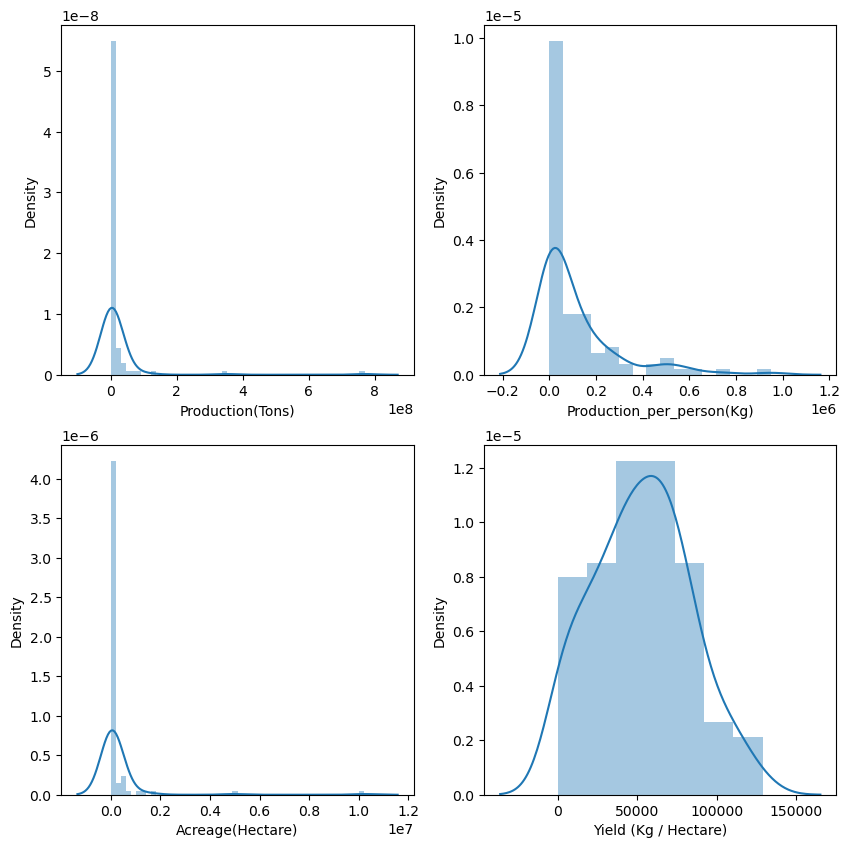

In [157]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.distplot(df["Production(Tons)"])
plt.subplot(2,2,2)
sns.distplot(df["Production_per_person(Kg)"])
plt.subplot(2,2,3)
sns.distplot(df["Acreage(Hectare)"])
plt.subplot(2,2,4)
sns.distplot(df["Yield (Kg / Hectare)"])


<h1 style="font-size:36px; color:RED;">CHECKING OUTLIERS AND REMOVING THEM</h1>

<Axes: ylabel='Yield (Kg / Hectare)'>

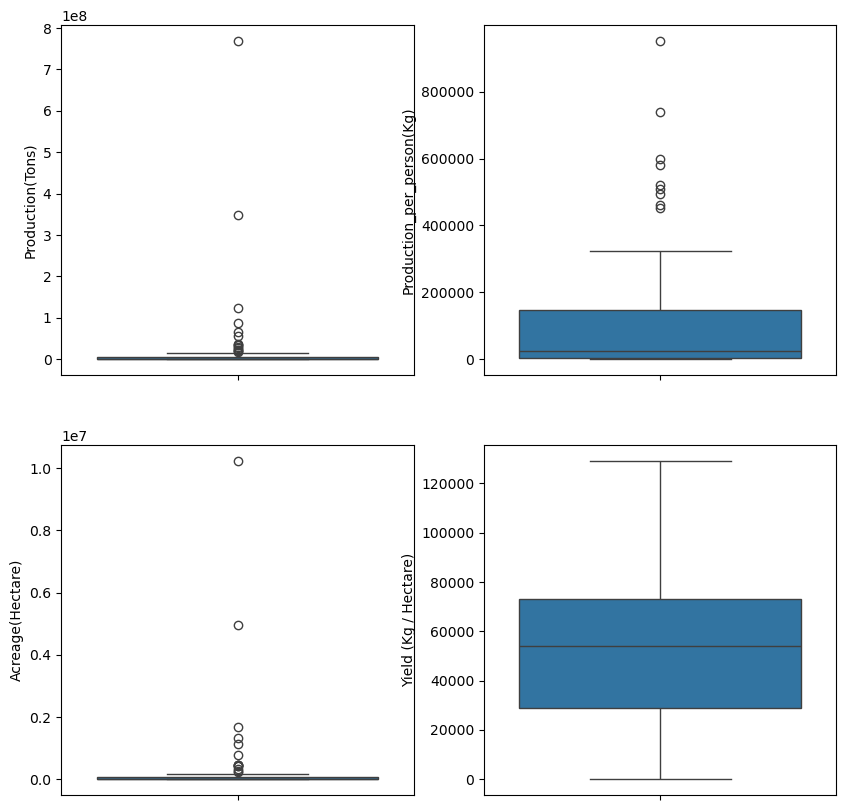

In [159]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.boxplot(df["Production(Tons)"])
plt.subplot(2,2,2)
sns.boxplot(df["Production_per_person(Kg)"])
plt.subplot(2,2,3)
sns.boxplot(df["Acreage(Hectare)"])
plt.subplot(2,2,4)
sns.boxplot(df["Yield (Kg / Hectare)"])



<h1 style="font-size:36px; color:RED;">BIRVARIATE</h1>

In [161]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [162]:
#We will create a new database that will have only country and production(ton) column

df_new = df[["Country","Production(Tons)"]].set_index("Country")

In [163]:
#We will create a new column that will give us percentage wise production of each country
df_new["Production(Tons)_percentage"]= df_new["Production(Tons)"] *100 / df_new["Production(Tons)"].sum()

In [164]:
#Top 5 Countries with max sugarcane production
df_new.head()


,Production(Tons),Production(Tons)_percentage
Country,,
Brazil,768678382.0,40.727285
India,348448000.0,18.462001
China,123059739.0,6.520138
Thailand,87468496.0,4.634389
Pakistan,65450704.0,3.467809


Text(0.5, 1.0, 'Sugar cane production of all the countries')

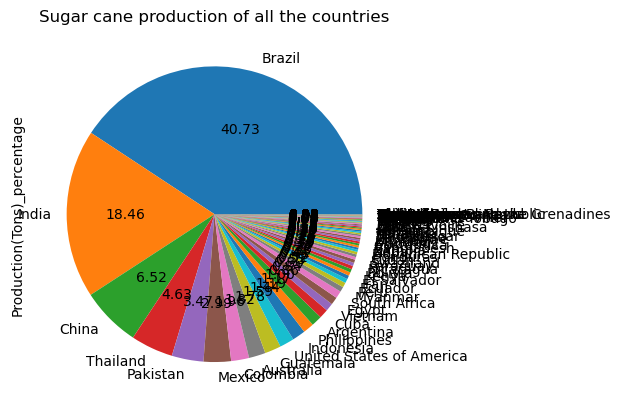

In [197]:
#Lets plot a pie chart for the above data for all the countries
df_new["Production(Tons)_percentage"].plot(kind = "pie", autopct = "%.2f")
plt.title("Sugar cane production of all the countries")

Text(0.5, 1.0, 'Sugar cane production in top 15 countries')

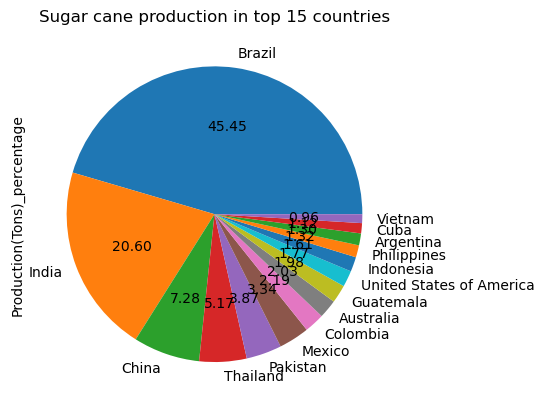

In [215]:
#15 top producer of sugar cane
df_new["Production(Tons)_percentage"].head(15).plot(kind = "pie", autopct = "%.2f")
plt.title("Sugar cane production in top 15 countries")

Text(0, 0.5, 'COUNTRIES')

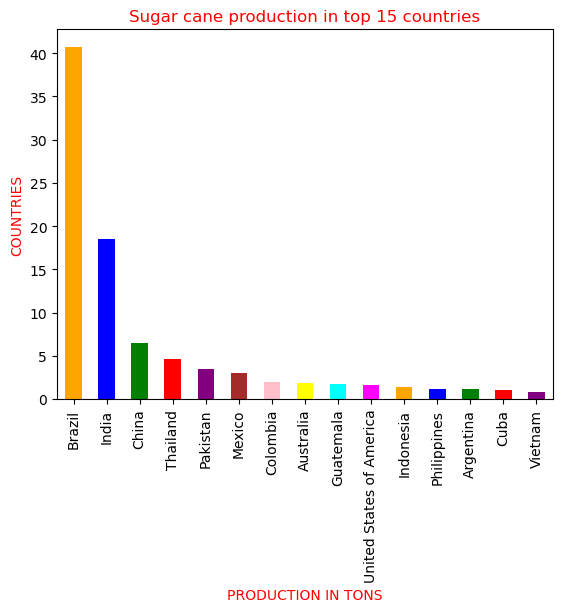

In [253]:
#15 top producer of sugar cane bar graph
colors = ["orange", "blue", "green", "red", "purple", "brown", "pink", "yellow", "cyan", "magenta"]
df_new["Production(Tons)_percentage"].head(15).plot(kind = "bar", color= colors)
plt.title("Sugar cane production in top 15 countries" ,  color = "red")
plt.xlabel("PRODUCTION IN TONS", color = "red")
plt.ylabel("COUNTRIES",  color = "red")

<h1 style="font-size:36px; color:RED;">AREA WISE LAND DISTRIBUTION</h1>

Text(0.5, 0, 'COUNTRIES')

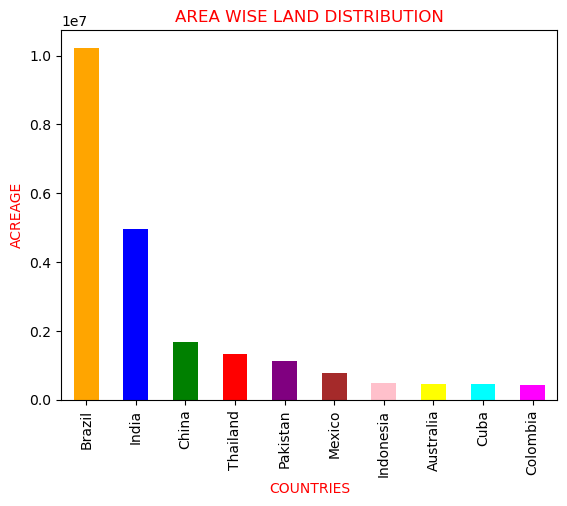

In [255]:
#10 top COUNTRIES WITH MAX LAND
df_new1 = df[["Country","Acreage(Hectare)"]].set_index("Country")
df_acre = df_new1.sort_values("Acreage(Hectare)", ascending = False)
colors = ["orange", "blue", "green", "red", "purple", "brown", "pink", "yellow", "cyan", "magenta"]
df_acre["Acreage(Hectare)"].head(10).plot(kind = "bar", color = colors)
plt.title("AREA WISE LAND DISTRIBUTION" ,  color = "red")
plt.ylabel("ACREAGE", color = "red")
plt.xlabel("COUNTRIES",  color = "red")

<h1 style="font-size:36px; color:RED;">Highest Yield Country</h1>

Text(0.5, 0, 'COUNTRIES')

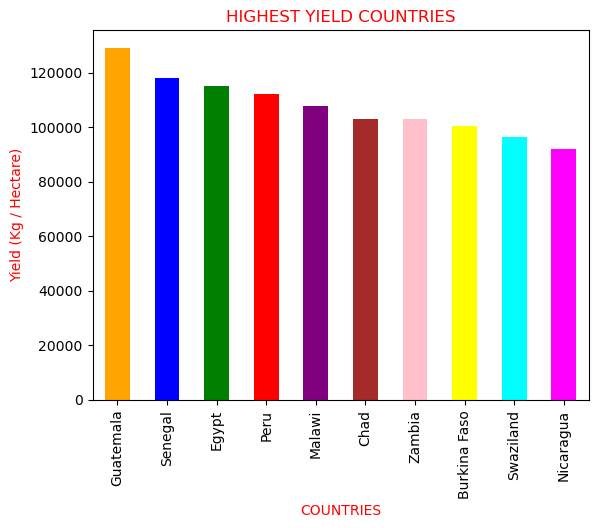

In [263]:
#10 top highest yield countries
df_new2 = df[["Country","Yield (Kg / Hectare)"]].set_index("Country")
df_acre1 = df_new2.sort_values("Yield (Kg / Hectare)", ascending = False)
colors = ["orange", "blue", "green", "red", "purple", "brown", "pink", "yellow", "cyan", "magenta"]
df_acre1["Yield (Kg / Hectare)"].head(10).plot(kind = "bar", color = colors)
plt.title("HIGHEST YIELD COUNTRIES" ,  color = "red")
plt.ylabel("Yield (Kg / Hectare)", color = "red")
plt.xlabel("COUNTRIES",  color = "red")

<h1 style="font-size:36px; color:RED;">PRODUCTION PER PERSON</h1>

Text(0.5, 1.0, 'Countries with highest production per person')

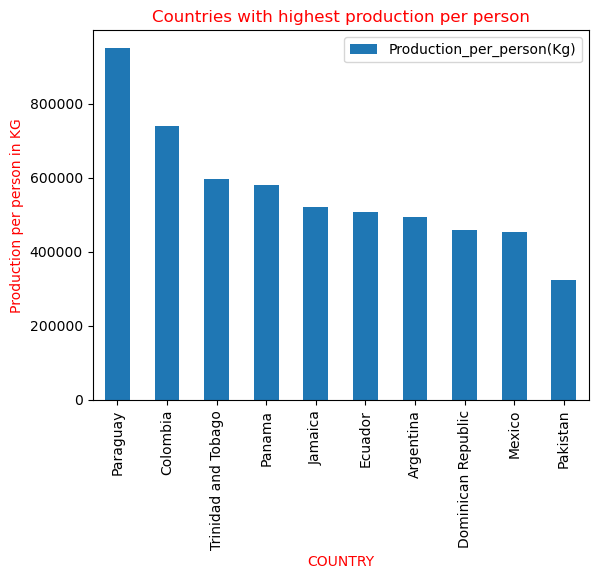

In [377]:
df_new_ = df[["Country", "Production_per_person(Kg)"]].set_index("Country")

df_new_.sort_values("Production_per_person(Kg)", ascending = False, inplace = True)
df_new_.head(10).plot(kind = "bar")
plt.xlabel("COUNTRY", color = "red")
plt.ylabel("Production per person in KG", color = "red")
plt.title("Countries with highest production per person", color = "red")


<h1 style="font-size:36px; color:RED;"> CORRELATION</h1>

In [393]:
#Create a seprate database with only numeric values
df1 = df[["Production(Tons)", "Production_per_person(Kg)","Acreage(Hectare)", "Yield (Kg / Hectare)"]]
df1.corr()

#MORE THE VALUE CLOSER TO 1 MORE IT IS DEPENDENT ON EACH OTHER

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield (Kg / Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
Production_per_person(Kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield (Kg / Hectare),0.132812,0.017999,0.113433,1.000000


<Axes: >

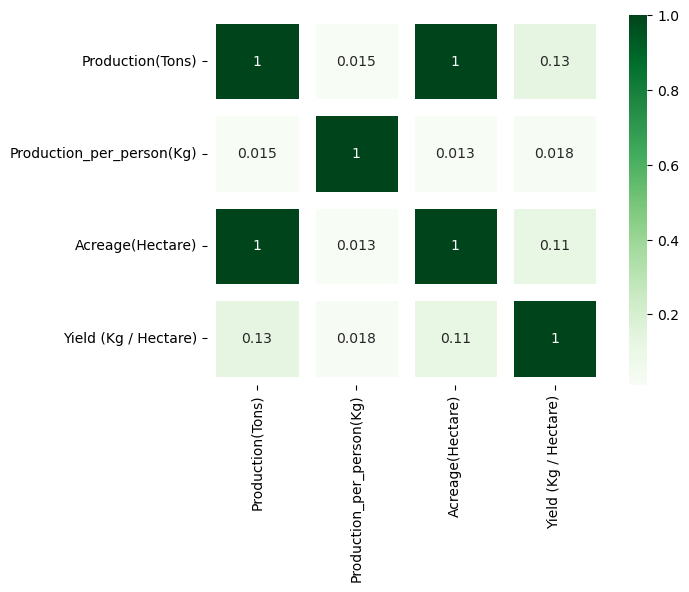

In [407]:
#Creating a heatmap to find the correlation 
sns.heatmap(df1.corr(), cmap = "Greens",annot= True, linewidths=11)


<h1 style="font-size:36px; color:RED;"> DO COUNTRIES WITH HIGH LAND PRODUCE MORE</h1>

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

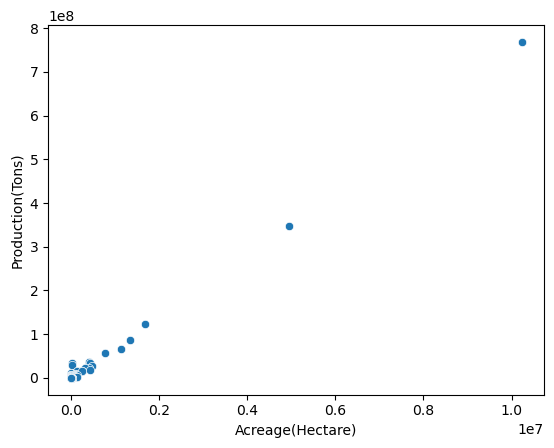

In [435]:
sns.scatterplot(data = df , x= "Acreage(Hectare)", y = "Production(Tons)")

<h1 style="font-size:24px; color:RED;"> DO COUNTRIES THAT HAVE HIGH YIELD PER HECTARE PRODUCE HIGH SUGARCANE IN TOTAL</h1>

<Axes: xlabel='Yield (Kg / Hectare)', ylabel='Production(Tons)'>

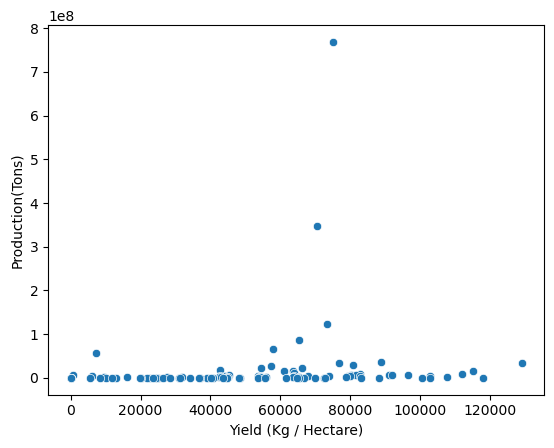

In [445]:
sns.scatterplot(data = df , x= "Yield (Kg / Hectare)", y = "Production(Tons)")

<h1 style="font-size:36px; color:RED;"> CONTENT ANALYSIS</h1>

<h1 style="font-size:24px; color:BLACK;"> WHICH CONTINENT PRODUCES MORE </h1>

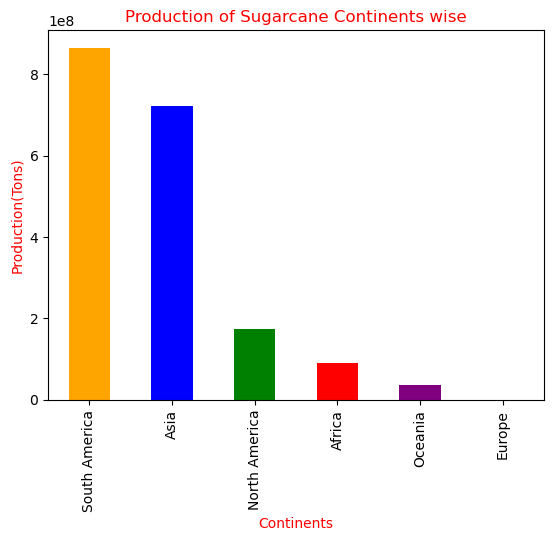

In [499]:
#Creating a new dataset that is according to the continents
df_Continent= df.groupby("Continent").sum()
#sorting the production in ascending order
df_Continent=df_Continent.sort_values("Production(Tons)", ascending =False)
#creating a bar graph now 
df_Continent["Production(Tons)"].plot(kind = "bar", color = colors)
plt.xlabel("Continents", color = "red")
plt.ylabel("Production(Tons)", color= "red")
plt.title("Production of Sugarcane Continents wise", color = "red")
plt.show()

<h1 style="font-size:24px; color:BLACK;"> Production share of Continent wise</h1>

<Axes: ylabel='Production(Tons)'>

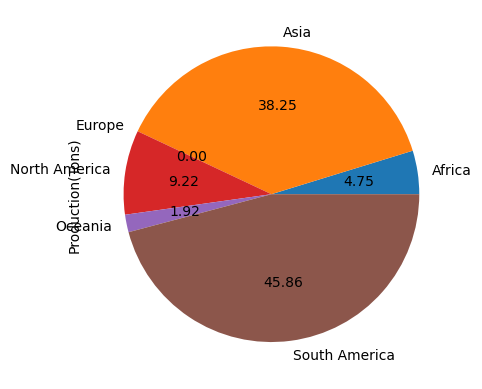

In [571]:
df1= df.groupby("Continent").sum()
df1["Production(Tons)"].plot(kind = "pie", autopct = "%.2f")

In [ ]:
prim(df_Continent)